<a id='top'></a>

# Homework 1: Data Cleaning and Exploratory Data Analysis 
***

**Name**: Chandler de Spirlet

***

This assignment is due on Canvas by **11:59 PM on Friday January 31**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. 
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5) 

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from math import sqrt
%matplotlib inline

[Back to top](#top)

<br>

<a/ id='p1'></a>

### (10 points) Problem 1
***

<img style="float: left; width: 200px; padding: 3mm;" src="https://aquarium.org/wp-content/uploads/2015/08/Seahorse-female.jpg" alt="Drawing"/>  
Poseidon is studying seahorses. Locations in each of the Atlantic, Pacific, Indian, Artic, and Southern Oceans are chosen to catch and release seahorses. After being caught, the seahorses are monitored for 24 hours while being fed organic, free-range plankton. The amount of plankton that each seahorse eats is recorded in an app on Poseidon’s phone, called Hippocampus. He collects 6 seahorses from the Arctic Ocean, 36 seahorses from the Pacific Ocean, 12 seahorses from the Indian Ocean, 6 seahorses from the Southern Ocean, and 42 seahorses from the Atlantic Ocean. 

Poseidon wants to get a sense for the average amount of plankton eaten by seahorses, so he uses the Hippcampus app to first order the seahorses in terms of when each seahorse was caught (first caught to last caught). Then, he selects every 3rd seahorse to see how much plankton was eaten.

$$ \quad $$
    
**Part A:** Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest

[Back to top](#top)

<br>

<a/ id='p2'></a>

### (25 points) Problem 2
***

A method to investigate the sensitivity of the sample mean and sample median to extreme outliers and changes in the dataset is to replace one or more elements in a given dataset by a number $y$ and investigate the effect when $y$ changes. To illustrate this, consider the following dataset:
 
$$  4.3 \quad 5.2 \quad 5.0 \quad 3.8 \quad 4.1 \quad 5.5 \quad 1.9 $$




**Part A:** Compute the sample mean and sample median. Do not use the canned mean and median python functions. Write your own code to compute these quantities. You may use the python length and sort functions, but that is it.

In [2]:
values = [4.3, 5.2, 5.0, 3.8, 4.1, 5.5, 1.9]
values.sort()
def sampleMean(x):
    sum = 0.0
    for num in x:
        sum += num
    return sum / len(x)
def sampleMedian(x):
    if (len(x) % 2 != 0):
        temp_len = len(x) - 1
        temp_len /= 2
    return (x[int(temp_len)])
    
print(sampleMean(values))
print(sampleMedian(values))

4.257142857142857
4.3


**Part B:** Now, recompute the mean and the median using the python numpy functions. Compare your answers to what you computed in Part A. Do your answer match? (Hint: They should!)

In [3]:
print(np.mean(values))
print(np.median(values))

4.257142857142857
4.3


The answers match.

**Part C:** Now consider the following data set. 
$$  4.3 \quad 5.2 \quad 5.0 \quad 3.8 \quad 4.1 \quad 5.5 \quad 1.9 \quad y$$

Is there a value for $y$ that would make the mean of the data equal to 7? If so, calculate the value of $y$ that makes the mean equal to 7. If not, clearly explain why not.
    
Is there a value for $y$ that would make the median of the data equal to 7? If so, calculate the values of $y$ that makes the median equal to 7. If not, clearly explain why not.

In [4]:
# Mean
values = [4.3, 5.2, 5.0, 3.8, 4.1, 5.5, 1.9]
values.sort()
length = len(values) + 1
sum = 0.0
for num in values:
    sum += num
neg_sum = 0.0 - sum
x = neg_sum + 56
print("The number that makes the mean 7 is: ", str(x))

The number that makes the mean 7 is:  26.200000000000003


$$ \frac{\sum values + x}{8} = 7 $$
$$ \sum values - 56 = -x $$
$$ \bar{x} = 7\: when\:x = 26.200000000000003 $$

The sorted list of numbers is [1.9, 3.8, 4.1, 4.3, 5.0, 5.2, 5.5]. Introducing another number, y, would not result in the median being 7. y could be any number, which would make either 4.3 and 5.0 the two numbers to be averaged, or 4.1 and 4.3 to be averaged, neither of which result in 7.

**Part D**: Compute the sample variance and the sample standard deviation for the original dataset given in part A using the formulas given in class. You may not use the built-in python variance, standard deviation, or sum functions. Using the length and square root functions is fine.

In [5]:
values = [4.3, 5.2, 5.0, 3.8, 4.1, 5.5, 1.9]
values.sort()
def sample_variance(nums):
    mean = sampleMean(nums) #Function from Problem 2 Part a
    computed = []
    idx = 0
    for number in values:
        temp = (values[idx] - mean) ** 2
        idx += 1
        computed.append(temp)
    sum_total = 0.0
    for item in computed:
        sum_total += item
    return (sum_total * (1/(len(values) - 1)))
def standard_deviation(variance):
    return (sqrt(variance))
print("The sample variance is: ", str(sample_variance(values)))
print("The standard deviation is: ", str(standard_deviation(sample_variance(values))))

The sample variance is:  1.4628571428571429
The standard deviation is:  1.209486313629527


**Part E:** Execute the following code. Does it match what you computed in part D? Why or why not? If not, how can you correct the code below?

In [6]:
dataset = [4.3, 5.2, 5.0, 3.8, 4.1, 5.5, 1.9]
print("The sample variance is: ", np.var(dataset))
print("the std dev is: ", np.std(dataset))

The sample variance is:  1.2538775510204085
the std dev is:  1.1197667395580244


The sample variance and standard deviation do not match because numpy calculates the sample variance with $$ \frac{1}{n} $$ degrees of freedom whereas I calculated the sample variance with $$\frac{1}{n - 1}$$ degrees of freedom. When using my functions with $$\frac{1}{n}$$ degrees of freedom, the values match

**Part F**: Again consider the data set from Part C: $$  4.3 \quad 5.2 \quad 5.0 \quad 3.8 \quad 4.1 \quad 5.5 \quad 1.9 \quad y$$

Compute the sample median for the following cases (you may use whatever built-in python functions you'd like): 
- $y=5$ 
- $y=50$ 
- $y=4.36$ 
- $y \to \infty$ 
- $y \to -\infty$

In [7]:
values = [4.3, 5.2, 5.0, 3.8, 4.1, 5.5, 1.9]
def median(numbers):
    numbers.sort()
    return np.median(numbers)
def calculate_medain(nums):
    y_vals = [5, 50, 4.36, 1.7976931348623157e+308, -1.7976931348623157e+307]
    for val in y_vals:
        nums.append(val)
        print("With y = {:.2f}, the median is {:.2f}.".format(val, median(nums)))
        del nums[-1]
calculate_medain(values)

With y = 5.00, the median is 4.65.
With y = 50.00, the median is 4.65.
With y = 4.36, the median is 4.33.
With y = 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.00, the median is 4.33.
With y = -17976931348623157580412819756850388593900235011794141176754562789180111453639664485361928830517704263393537268510363518759043843737070229269956251768752166883397940628862983287625967246810352023792017211936260189893797509826303293149283469713429932049693599732425511693654044437030940398714664210204414967808.00, the median is 4.20.


**Part G**: Think about the previous parts, above, and describe in words or mathematical notation the answer to the following question:

- By varying $y$, what is the set of all the possible values that the sample mean could take on?


By varying the values of y, the median can be 4.2, 4.33, or 4.65

**Part H**: Describe in words or mathematical notation, what happens to the sample standard deviation when $y$ is varied in the following ways: 
 
- $y \to \infty$ 
- $y \to \bar{x}$

In [8]:
values = [4.3, 5.2, 5.0, 3.8, 4.1, 5.5, 1.9]
print("The sample variance is: ", np.var(values))
print("the std dev is: ", np.std(values))
values.append(1.7976931348623157e+150)
print("The sample variance is: ", np.var(values))
print("the std dev is: ", np.std(values))
del values[-1]
values.append(np.mean(values))
print("The sample variance is: ", np.var(values))
print("the std dev is: ", np.std(values))

The sample variance is:  1.2538775510204085
the std dev is:  1.1197667395580244
The sample variance is:  3.53467253904964e+299
the std dev is:  5.945311210567232e+149
The sample variance is:  1.0971428571428574
the std dev is:  1.0474458731327636


As seen in the following code above, the sample variance and standard deviation do not change by much when the mean of the list is appended to the list. However, when a number that approaches infinity is added to the list, the standard deviation and sample variance tend towards infinity.

[Back to top](#top)

<a/ id='p3'></a>

## (25 pts) Problem 3
*** 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

We have the data on survival rates by class and by sex, so let's figure out whether there is evidence for these scenarios. Access the Titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival (**Survived**), and gender (**Sex**) of passengers, among other things. Be sure to use the `titanic_data.csv` data set, *not* the `clean_titanic_data` file from the in-class notebook.

In [9]:
filepath = 'titanic_data.csv'
df = pd.read_csv(filepath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**: Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours instead. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

To support the class warfare hypothesis, you would see more Pclass values as 1 as opposed to 3.
To support the male chivalry hypothesis, you would see more females in the Sex catecory and more male and females with ages below 18. 
The two evens do not have to be mutually exclusive. More upperclass passengers could have boarded the life rafts where upperclass males could sacrifice their spot for another upperclass child or female.

**Part B**: Use Pandas methods to create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. Be sure to show any exploratory work determining if/where there are rows with missing values.

In [10]:
df['Survived'].replace('', np.nan, inplace=True)
df['Pclass'].replace('', np.nan, inplace=True)
df['Age'].replace('', np.nan, inplace=True)
df['Sex'].replace('', np.nan, inplace=True)
df.dropna(subset=['Survived'], inplace=True)
df.dropna(subset=['Pclass'], inplace=True)
df.dropna(subset=['Age'], inplace=True)
df.dropna(subset=['Sex'], inplace=True)
dfTitanic = df

**Part C**: Compute the fraction of survivors according to class and gender. There are 3 passenger classes and 2 sexes in the data set, so you should report all 6 possible combinations.  Then, answer 3 questions:
* **(i)** Within each passenger class, were men or women more/less/equally likely to survive?
* **(ii)**  Looking at only the male or only the female passengers, how is passenger class related to the category's survival rate?
* **(iii)**  Did men in first class or women in third class have a higher survival rate? 

In [11]:
dataSample = dfTitanic.groupby(["Sex", "Pclass"]).size().reset_index(name="Numbers")
totalInstances = dataSample["Numbers"].sum()
femaleFirst = dataSample.loc[(dataSample['Sex'] == 'female') & (dataSample['Pclass'] == 1)].Numbers
femaleSecond = dataSample.loc[(dataSample['Sex'] == 'female') & (dataSample['Pclass'] == 2)].Numbers
femaleThird = dataSample.loc[(dataSample['Sex'] == 'female') & (dataSample['Pclass'] == 3)].Numbers
maleFirst = dataSample.loc[(dataSample['Sex'] == 'male') & (dataSample['Pclass'] == 1)].Numbers
maleSecond = dataSample.loc[(dataSample['Sex'] == 'male') & (dataSample['Pclass'] == 2)].Numbers
maleThird = dataSample.loc[(dataSample['Sex'] == 'male') & (dataSample['Pclass'] == 3)].Numbers
print("First class females are {} out of {}. Resulting in {}/{}".format(femaleFirst[0], totalInstances, femaleFirst[0], totalInstances))
print("Second class females are {} out of {}. Resulting in {}/{}".format(femaleSecond[1], totalInstances, femaleSecond[1], totalInstances))
print("Third class females are {} out of {}. Resulting in {}/{}".format(femaleThird[2], totalInstances, femaleThird[2], totalInstances))
print("First class males are {} out of {}. Resulting in {}/{}".format(maleFirst[3], totalInstances, maleFirst[3], totalInstances))
print("Second class males are {} out of {}. Resulting in {}/{}".format(maleSecond[4], totalInstances, maleSecond[4], totalInstances))
print("Third class males are {} out of {}. Resulting in {}/{}".format(maleThird[5], totalInstances, maleThird[5], totalInstances))

First class females are 75 out of 714. Resulting in 75/714
Second class females are 58 out of 714. Resulting in 58/714
Third class females are 118 out of 714. Resulting in 118/714
First class males are 93 out of 714. Resulting in 93/714
Second class males are 87 out of 714. Resulting in 87/714
Third class males are 283 out of 714. Resulting in 283/714


* **(i)** Within each passenger class, the males were more likely to survive.
* **(ii)** For both male and female, the male or female in third class was most likely to survive followed by first class, then closely by second class.
* **(iii)** Females in third class had a higher survival rate than males in first class.

**Part D**: Plot a histogram of all of the passenger ages, using the bin edges $[0,5,10,\ldots,70,75,80]$ defined by `my_bins` below. How would you characterize the distribution of **AGE**? (By _characterize_ we mean that you should indicate whether the data are unimodal, bimodal, multimodal, symmetric, negatively skewed, positively skewed, etc.)  Be sure to label your axes and use your figure to justify your conclusions.

In [12]:
my_bins = range(0,85,5)

Text(0, 0.5, 'Frequency of Ages')

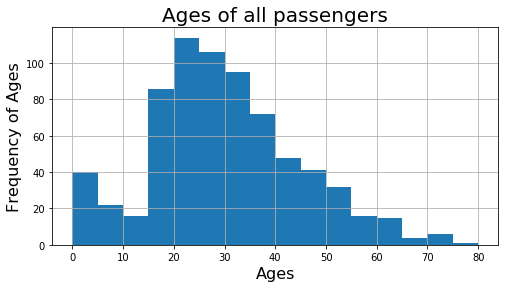

In [13]:
# Initialize figure 
fig, ax = plt.subplots(figsize=(8,4))

# Plot histogram 
dfTitanic.hist(column="Age", ax=ax, bins=my_bins);

# Add a title
ax.set_title("Ages of all passengers", fontsize=20)

# Add axis labels 
ax.set_xlabel("Ages", fontsize=16)
ax.set_ylabel("Frequency of Ages", fontsize=16)


The Ages of all pagessengers appears to be bimodal with a slight left skew.

**Part E**: One might wonder how a passenger's age is related to the likelihood that they would survive the Titanic disaster. To answer this question graphically, plot two density histograms on the same set of axes, showing the distribution of the ages of passengers who survived, and the distribution of the ages of passengers who did not. 
* Use the bin edges $[0,5,10,\ldots,70,75,80]$ for both histograms.
* This problem is about a *ship* sinking in the *ocean*, so use **coral** and **seagreen** as the facecolors for your histogram boxes.
* Plot both histograms on a single set of axes (there should be only one panel in the figure you create), but use Matplotlib/Pandas plotting functionality to make the faces of the histogram boxes somewhat transparent, so both histograms are visible.
* Include a legend and label your axes.
* Comment on the results. Does your figure suggest that some age ranges are more or less likely to have survived the disaster than other ages? Fully explain your reasoning and use your figure to justify your conclusions.
* If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

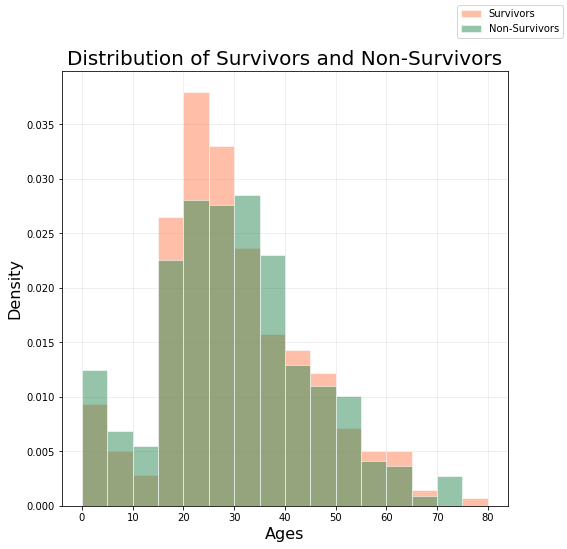

In [14]:
# Initialize figure subplots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))

# --------------------------------------
# Plot histogram for Niwot on Top 
# --------------------------------------
dfTitanic.loc[dfTitanic["Survived"]==1].hist(column="Age", ax=axes, facecolor="coral", edgecolor="white", density=True, bins=my_bins, label='Survivors', alpha=0.5)
dfTitanic.loc[dfTitanic["Survived"]==0].hist(column="Age", ax=axes, facecolor="seagreen", edgecolor="white", density=True, bins=my_bins, label='Non-Survivors', alpha=0.5)                                                     
# Add titles and labels 
axes.set_title("Distribution of Survivors and Non-Survivors", fontsize=20)
axes.set_xlabel("Ages", fontsize=16)
axes.set_ylabel("Density", fontsize=16)

# Make grid lighter and set behind data
axes.grid(alpha=0.25)
axes.set_axisbelow(True)
                                                   
fig.subplots_adjust(hspace=.5)
fig.legend(loc='upper right')

It appears as if there are more survivors in the 20-30 age range. The older the individual, the less likely they are to survive. Between 0-15, there is also a low survival rating, most likely because it is more difficult to manage children in hectic times.

**Part F:** In Part E, we plotted two *density* histograms, showing the distributions of ages of passengers that survived or did not survive the Titanic disaster. Why would it be misleading for us to have plotted these as *frequency* histograms instead?

The frequency histogram would have showed us the numbers of people in each age group that survived or didn't, meaning that it would not have given us the likelyhood of survival, but rather the number of survivors.

**Part G**: Do the data suggest class warfare, male chivalry, or some combination of both characteristics in the final hours aboard the Titanic?  Justify your conclusion based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusion.

The ratings of survivors shows that more males are to have survived than females. The ratings also show that there were more third class survivors. The histograms showed that the individuals in the 20-30 year old range were more likely to survive as well. There was most likely a combination of both class warfare and male chivalry aboard the Titanic. This is because there was more third class survivors who survived and more 20-30 year old people.

[Back to top](#top)
<a/ id='p4'></a>

## (25 pts) Problem 4 (Snowfall in Boulder)
***

The NOAA Earth System Research Laboratory (ESRL) Physical Sciences Division (PSD) conducts scientific research to observe, understand, model, predict, and forecast weather, water, and climate extremes and their impacts. They have a website with publicly available data. One such data set contains monthly snowfall for Boulder dating back to 1889 (https://www.esrl.noaa.gov/psd/boulder/bouldersnow.html). Load ‘Boulder_Snowfall.csv’ from the Canvas page. 

**Part A:** To start, we need to “clean” our data set. When the amount of snow was nonzero, but too small to be recorded, this data set recorded ‘T’. Replace those instances with zeros. AFTER, you've done that, remove any rows (which correspond to years) with missing data. As a check, if you've cleaned the file correctly, there should be 121 rows remaining. 

In [15]:
file_path = 'Boulder_Snowfall.csv'
df = pd.read_csv(file_path)
def fix_data(val):
    if pd.isnull(val):
        return val
    num_str = val
    stripped_val = val.strip()
    if (stripped_val == 'T'):
        num_str = stripped_val.replace('T', '0.0')
    if (stripped_val == '.'):
        num_str = stripped_val.replace('.', '0.0')
    num = float(num_str)
    return num 
def fix_totals(val):
    if pd.isnull(val):
        return val
    num_str = val
    stripped_val = val.strip()
    if (stripped_val == '.'):
        num_str = stripped_val.replace('.', '0.0')
    num = float(num_str)
    return num
df.loc[:,"Total Sep-Jun"] = df.loc[:,"Total Sep-Jun"].apply(fix_totals)
df.loc[:,"Total Jan-Dec"] = df.loc[:,"Total Jan-Dec"].apply(fix_totals)
df.loc[:,"Jan"] = df.loc[:,"Jan"].apply(fix_data)
df.loc[:,"Feb"] = df.loc[:,"Feb"].apply(fix_data)
df.loc[:,"Mar"] = df.loc[:,"Mar"].apply(fix_data)
df.loc[:,"Apr"] = df.loc[:,"Apr"].apply(fix_data)
df.loc[:,"May"] = df.loc[:,"May"].apply(fix_data)
df.loc[:,"Jun"] = df.loc[:,"Jun"].apply(fix_data)
df.loc[:,"Jul"] = df.loc[:,"Jul"].apply(fix_data)
df.loc[:,"Aug"] = df.loc[:,"Aug"].apply(fix_data)
df.loc[:,"Sep"] = df.loc[:,"Sep"].apply(fix_data)
df.loc[:,"Oct"] = df.loc[:,"Oct"].apply(fix_data)
df.loc[:,"Nov"] = df.loc[:,"Nov"].apply(fix_data)
df.loc[:,"Dec"] = df.loc[:,"Dec"].apply(fix_data)

df = df.drop(df[ (df['Jan'] == 0.0) & (df['Feb'] == 0.0) & (df['Mar'] == 0.0) & (df['Apr'] == 0.0) & (df['May'] == 0.0) & (df['Jun'] == 0.0) & (df['Jul'] == 0.0) & (df['Aug'] == 0.0) & (df['Sep'] == 0.0) & (df['Oct'] == 0.0) & (df['Nov'] == 0.0) & (df['Dec'] == 0.0) ].index)
df = df.drop(df[ (df["Total Sep-Jun"] == 0.0) & (df["Total Jan-Dec"] == 0.0)].index)
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total Sep-Jun,Total Jan-Dec
5,1897,5.8,10.2,13.7,11.3,0.0,0.0,0.0,0.0,0.0,8.7,5.5,9.0,0.0,64.2
6,1898,7.0,4.2,7.5,8.2,13.0,0.0,0.0,0.0,1.0,5.0,23.5,18.0,63.1,87.4
7,1899,13.0,15.2,31.0,8.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,12.8,114.7,82.0
8,1900,4.5,14.8,6.8,20.0,0.0,0.0,0.0,0.0,0.0,0.0,3.1,9.2,60.9,58.4
9,1901,7.5,6.2,18.5,26.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,15.0,70.5,77.2


 **Part B:** Plot the last column of data, “Total Jan-Dec”, from the cleaned data set. Label your axes. Do you observe any trends? Discuss.

[Note: Make sure that your x-axis tick labels are in years and are readable. You may have to play around with formatting the ticklabels. plt.MaxNLocator might be helpful depending on how you plotted your data.] 

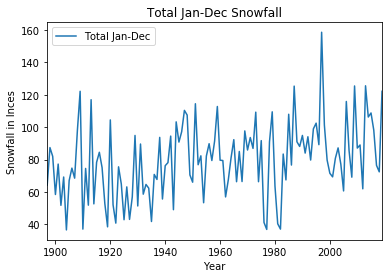

In [69]:

df.plot.line(x="Year", y="Total Jan-Dec", title="Total Jan-Dec Snowfall");
plt.ylabel("Snowfall in Inces")
plt.show(block=True);


**Part C:** Using your cleaned data set, create a histogram of the yearly snowfall. Bin your data with a bin-width of 5 inches, starting at 35 inches. Make the edgecolor of your graph white. What is the most common amount of snow to get in a year? How does this compare with how much snow we got in 2019? 

     Year   Jan   Feb   Mar   Apr  May  Jun  Jul  Aug  Sep   Oct   Nov  Dec  \
127  2019  14.5  14.6  16.2  10.2  7.4  0.0  0.0  0.0  0.0  26.4  29.5  3.4   

     Total Sep-Jun  Total Jan-Dec  
127           59.3          122.2  


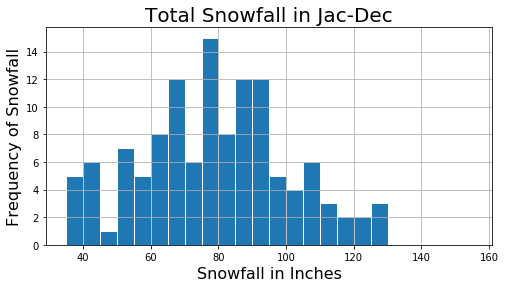

In [62]:
my_bins = range(35, 160, 5)
# Initialize figure 
fig, ax = plt.subplots(figsize=(8,4))

# Plot histogram 
df.hist(column="Total Jan-Dec", ax=ax, bins=my_bins, edgecolor='white');

# Add a title
ax.set_title("Total Snowfall in Jac-Dec", fontsize=20)

# Add axis labels 
ax.set_xlabel("Snowfall in Inches", fontsize=16)
ax.set_ylabel("Frequency of Snowfall", fontsize=16)
snow2019 = df.loc[(df['Year'] == 2019)]
print(snow2019)

The most common amount of snow to get is between 75 and 80 inches. This is less than the amount of snow in 2019, which was 122.2 inches

**Part D:** Generate a series of 12 box plots to represent each decade starting in 1900, using your cleaned data set. Orient the box plots so that the decades (‘1900-1909’, ‘1910-1919’, … , ‘2010-2019’) appear along the x-axis, and the y-axis shows the amount of snowfall. Have all 12 boxplots as part of one graph. Include appropriate labels to your axes and a title, so that if someone not in our class were to look at your plots, they would understand what they were looking at. 

[Note: Data from the year 2004 was dropped during the initial cleaning of the data set (or should have been). Keep this in mind when plotting data from the 2000-2009 decade.]

KeyError: ''

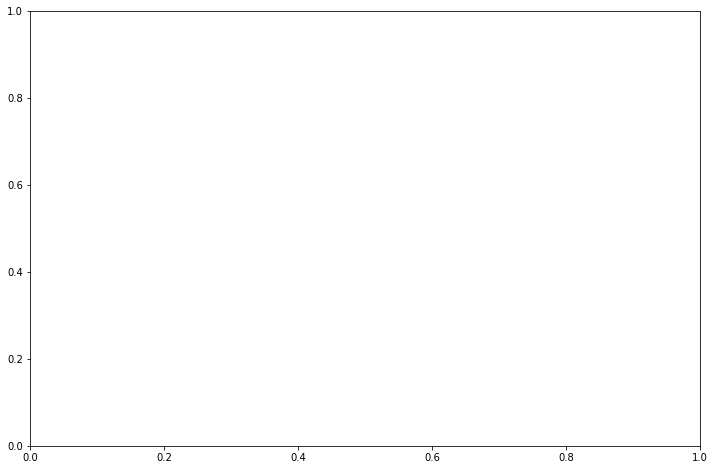

In [84]:
#print 'label slice =>\n', y.loc['b': 'd'], '\n'


# Initialize figure 
fig, ax = plt.subplots(figsize=(12,8))

# plot boxplots of PRCP for all stations but sugarloaf 
bp = df.loc[df["Year"] != 0].boxplot(column="Total Jan-Dec", by="Year", ax=ax, return_type="dict")
print(bp)
# This time, bp is a Pandas series containing multiple dictionaries
# corresponding to the two sets of data. We loop over each one individually 
# and set the parameters we want 
for column in bp:
    # Change properties in boxes 
    for box in column['boxes']:
        box.set(color='steelblue', linewidth=2)
    
    # Change properties of whiskers 
    for whisker in column['whiskers']:
        whisker.set(color='gray', linewidth=2)

    # Change properties of caps 
    for cap in column['caps']:
        cap.set(color='gray', linewidth=2)

    # Change properties of median 
    for cap in column['medians']:
        cap.set(color='green', linewidth=2, alpha=0.5)

    # Change properties of fliers (outliers) 
    for cap in column['fliers']:
        cap.set(markerfacecolor='steelblue', linewidth=2, marker='s', markersize=6, alpha=0.5)

# Set title and vertical axis label
ax.set_title('Percipitation Across Stations', fontsize=18)
ax.set_ylabel("Percipitation (in inches)", fontsize=16)

# Set names of plots
#short_names = ["Boulder 14", "Boulder", "Gross Res", "Niwot", "Northglenn", "Ralston Res"]
plt.xticks(range(1,len(short_names)+1),short_names, rotation=90, fontsize=16)

# Get rid of automatically generated titles and xlables
plt.suptitle("")
ax.set_xlabel("")

# Make grid-lines lighter
ax.grid(alpha=0.25);


**Part E:** It’s almost February, so let’s study snowfall in Boulder, in February. Compute the mean February snowfall using your cleaned data set. Next calculate the Tukey 5-number summary for the February snowfall data. Lastly, generate a boxplot for the February snowfall. 

Mean February snowfall is 11.446341463414631 inches.
5-Number Summary: 0.00    5.45    9.90    16.50    54.60


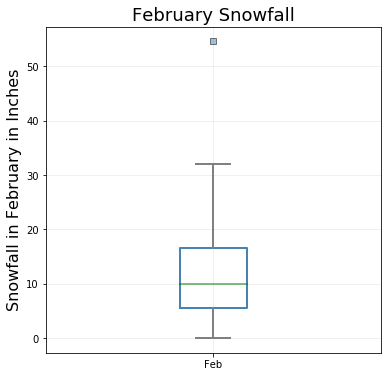

In [74]:
print("Mean February snowfall is {} inches.".format(df.loc[:,"Feb"].mean()))
minval = df["Feb"].min() # your code goes here!
maxval = df["Feb"].max() # ... and here
Q1 = df["Feb"].quantile(.25) # ... and here
Q2 = df["Feb"].quantile(.50) # ... and here
Q3 = df["Feb"].quantile(.75) # ... and here!
print("5-Number Summary: {:.2f}    {:.2f}    {:.2f}    {:.2f}    {:.2f}".format(minval, Q1, Q2, Q3, maxval))
# Initialize figure 
fig, ax = plt.subplots(figsize=(6,6))

# Plot histogram, but this time return dictionary of style parameters for modification after the fact 
bp = df.boxplot(column="Feb", ax=ax, widths=[.2], return_type='dict');

# ---------------------------------------
# Set properties of various parts of plot 
# ---------------------------------------

# Change properties of boxes 
for box in bp['boxes']:
    box.set(color='steelblue', linewidth=2)
    
# Change properties of whiskers 
for whisker in bp['whiskers']:
    whisker.set(color='gray', linewidth=2)
    
# Change properties of caps 
for cap in bp['caps']:
    cap.set(color='gray', linewidth=2)
    
# Change properties of median 
for cap in bp['medians']:
    cap.set(color='green', linewidth=2, alpha=0.5)
    
# Change properties of fliers (outliers) 
for flier in bp['fliers']:
    flier.set(markerfacecolor='steelblue', linewidth=2, marker='s', markersize=6, alpha=0.5)

# Set title and vertical axis label
ax.set_title('February Snowfall', fontsize=18)
ax.set_ylabel("Snowfall in February in Inches", fontsize=16)

# Make grid-lines lighter
ax.grid(alpha=0.25)

**Part F:** Plot all of the February snowfall with a line plot, using your cleaned data set. How many inches of snow do you predict we will get this February in Boulder? Once February is over, we’ll see who was the closest!

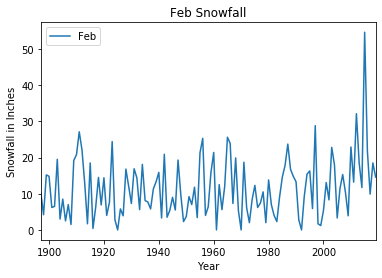

In [70]:
df.plot.line(x="Year", y="Feb", title="Feb Snowfall");
plt.ylabel('Snowfall in Inches')
plt.show(block=True);

I predict that we will get 14 inches of snow in February.

[Back to top](#top)
<a/ id='p5'></a>

## (15 pts) Problem 5
***
Consider the following 3 data sets:

`A=[8, 6, 7, 5, 3, 0, 9]`

`B=[2, 29, 84, 2, 10, 69, 3, 31, 18]`

`C` is the random data set generated by using `np.random.randint(0,1000, size=100)`

For each data set, perform the following computations:

**Part A:** Compute and print the mean and standard deviation of the data set. You may use built-in python functions.

In [21]:
A = [8, 6, 7, 5, 3, 0, 9]
B = [2, 29, 84, 2, 10, 69, 3, 31, 18]
C = np.random.randint(0,1000, size=100)
print("The mean for set A is: {} with a standard deviation of: {}".format(np.mean(A), np.std(A)))
print("The mean for set B is: {} with a standard deviation of: {}".format(np.mean(B), np.std(B)))
print("The mean for set C is: {} with a standard deviation of: {}".format(np.mean(C), np.std(C)))

The mean for set A is: 5.428571428571429 with a standard deviation of: 2.8713930346059686
The mean for set B is: 27.555555555555557 with a standard deviation of: 28.335729746151124
The mean for set C is: 479.37 with a standard deviation of: 298.53122633989227


**Part B:** Compute and print  the mean and standard deviation of the new data set formed by subtracting the original mean from each observation.

In [22]:
meanA = np.mean(A)
meanB = np.mean(B)
meanC = np.mean(C)
tempA = []
tempB = []
tempC = []
for item in A:
    tempA.append(item - meanA)
for item in B:
    tempB.append(item - meanB)
for item in C:
    tempC.append(item - meanC)
print("The mean for set A is: {} with a standard deviation of: {}".format(np.mean(tempA), np.std(tempA)))
print("The mean for set B is: {} with a standard deviation of: {}".format(np.mean(tempB), np.std(tempB)))
print("The mean for set C is: {} with a standard deviation of: {}".format(np.mean(tempC), np.std(tempC)))

The mean for set A is: -2.5376526277146434e-16 with a standard deviation of: 2.8713930346059686
The mean for set B is: -1.578983857244667e-15 with a standard deviation of: 28.335729746151124
The mean for set C is: 1.1368683772161603e-15 with a standard deviation of: 298.53122633989227


**Part C:** Compute and print  the mean and standard deviation of the new data set formed by subtracting the original mean from each observation and then dividing by the original standard deviation.

In [23]:
meanA = np.mean(A)
meanB = np.mean(B)
meanC = np.mean(C)
stdA = np.std(A)
stdB = np.std(B)
stdC = np.std(C)
tempA = []
tempB = []
tempC = []
for item in A:
    tempA.append((item - meanA) / stdA)
for item in B:
    tempB.append((item - meanB) / stdB)
for item in C:
    tempC.append((item - meanC) / stdC)
print("The mean for set A is: {} with a standard deviation of: {}".format(np.mean(tempA), np.std(tempA)))
print("The mean for set B is: {} with a standard deviation of: {}".format(np.mean(tempB), np.std(tempB)))
print("The mean for set C is: {} with a standard deviation of: {}".format(np.mean(tempC), np.std(tempC)))

The mean for set A is: -6.344131569286608e-17 with a standard deviation of: 1.0
The mean for set B is: -3.0839528461809905e-17 with a standard deviation of: 1.0
The mean for set C is: 4.440892098500626e-18 with a standard deviation of: 1.0


**Part D:** Why might this result matter?

This result might matter because it shows that even when the values of the data set are manipulated by subtacting the same value from each observation, the standard deviation stays the same. It also shows that, when each observation has the same value subracted itself and is divided by the standard deviation, the result is 1.